In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/wenyuzhang/Downloads/all_images_w_label.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path, header=None)


label:  0


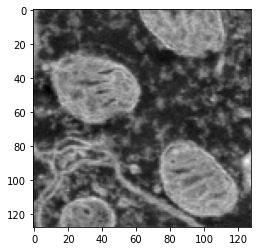

In [6]:
# Extract the first row (excluding the label)
first_image = data.iloc[0, :-1].values
first_image = first_image.astype(np.uint8)

# Reshape the image to 128x128 and display it
first_image = first_image.reshape(128, 128)
print("label: ", data.iloc[0, -1])
plt.imshow(first_image, cmap='gray')
plt.show()

label:  1


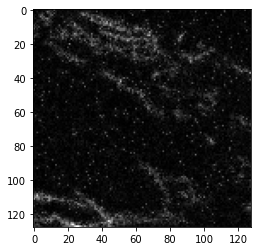

In [8]:
# Extract the first row (excluding the label)
second_image = data.iloc[3100, :-1].values
second_image = second_image.astype(np.uint8)

# Reshape the image to 128x128 and display it
second_image = second_image.reshape(128, 128)
print("label: ", data.iloc[3100, -1])
plt.imshow(second_image, cmap='gray')
plt.show()

label:  2


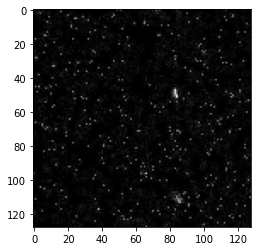

In [9]:
thired_image = data.iloc[6100, :-1].values
thired_image = thired_image.astype(np.uint8)

# Reshape the image to 128x128 and display it
thired_image = thired_image.reshape(128, 128)
print("label: ", data.iloc[6100, -1])
plt.imshow(thired_image, cmap='gray')
plt.show()

# CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Assuming 'data' is your loaded dataset
X = data.iloc[:, :-1].values.reshape(-1, 128, 128, 1) / 255.0  # Normalize pixel values
y = data.iloc[:, -1].values  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Deep Learning with convolution layer (CNN)
The proposed CNN model is designed for image classification tasks involving gray-scale images of dimensions 128x128. 

1. Input: Image of dimensions (128, 128, 1).
    - The input layer takes gray-scale images of size 128x128.
    
2. Convolution Layer Conv1:
    - Image dimensions: (128, 128)
    - Conv1-1: Applies 32 filters of size 3x3.
    - Max Pooling: Reduces the dimensions to (64, 64).
    - Activation Function: ReLU (Rectified Linear Unit).
    
3. Convolution Layer Conv2:
    - Input Image dimensions: (64, 64).
    - Conv2-1: Increases the filters to 64 of size 3x3.
    - Max Pooling: Further reduces the dimensions to (32, 32).
    - Activation Function: ReLU.
    
4. Flattening Layer:
    - The output from the previous convolution layer is flattened.
    - This creates a single long vector to be fed into the dense layer.
5. Fully Connected/Dense Layer (FC1):
    - The flattened vector is passed through a dense layer with 64 nodes.
    - Activation Function: ReLU.
This layer is responsible for making connections between the features learned in the convolution layers and the final output.
Output Layer:

A final dense layer with a number of nodes equal to the number of classes (e.g., 10 for a dataset with 10 classes).
Activation Function: Softmax, to output a probability distribution over the class labels.

In [11]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Use the appropriate number of units in the last layer
])


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
180/180 [==============================] - 61s 329ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 6.3791e-05 - val_accuracy: 1.0000
Epoch 2/5
180/180 [==============================] - 71s 397ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 7.0072e-05 - val_accuracy: 1.0000
Epoch 3/5
180/180 [==============================] - 73s 408ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 7.3038e-05 - val_accuracy: 1.0000
Epoch 4/5
180/180 [==============================] - 87s 483ms/step - loss: 3.8651e-05 - accuracy: 1.0000 - val_loss: 1.7538e-05 - val_accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 7s 120ms/step - loss: 8.6635e-04 - accuracy: 0.9994
Test accuracy: 0.9994444251060486
